In [13]:
pip install tensorflow==2.18.0

Note: you may need to restart the kernel to use updated packages.


In [96]:
import tensorflow as tf 
print(tf.__version__)

2.18.0


In [97]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
dataset= pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
X= dataset.iloc[:,3:13]
y= dataset.iloc[:, 13]

In [100]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [101]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [102]:
## feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [103]:
## concat vairables with df 
X= X.drop(['Geography','Gender'],axis= 1)

In [104]:
pd.concat([X,geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [106]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [108]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [109]:
X_train.shape

(8000, 8)

In [110]:
X_test.shape

(2000, 8)

In [111]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [112]:
## initialize the ANN
classifier = Sequential()


In [113]:
## add Input layer
classifier.add(Dense(units=11, activation='relu'))

In [134]:
## add first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [135]:
## add second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [136]:
## add output layer
classifier.add(Dense(1, activation='sigmoid'))

In [137]:
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [138]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [139]:
## Early stopping

import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [140]:
model_history= classifier.fit(X_train,y_train,validation_split= 0.33, batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7688 - loss: 0.6255 - val_accuracy: 0.7955 - val_loss: 0.4810
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8334 - loss: 0.4605 - val_accuracy: 0.8485 - val_loss: 0.4022
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.4277 - val_accuracy: 0.8466 - val_loss: 0.3899
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8441 - loss: 0.4147 - val_accuracy: 0.8474 - val_loss: 0.3849
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8465 - loss: 0.3981 - val_accuracy: 0.8455 - val_loss: 0.3873
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8377 - loss: 0.4060 - val_accuracy: 0.8531 - val_loss: 0.3776
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8558 - loss: 0.3780 - val_accuracy: 0.8489 - val_loss: 0.3790
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8511 - loss: 0.3799 - 

In [141]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

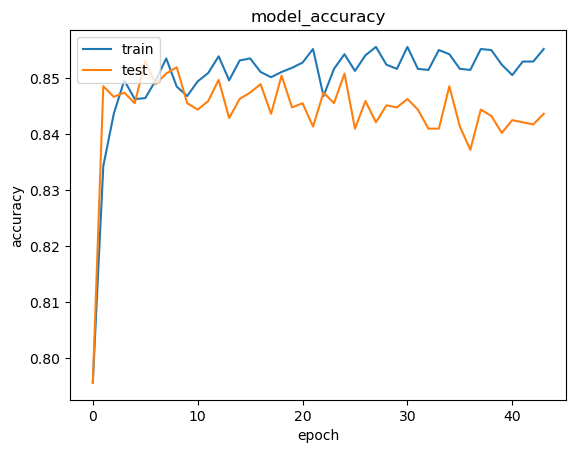

In [142]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

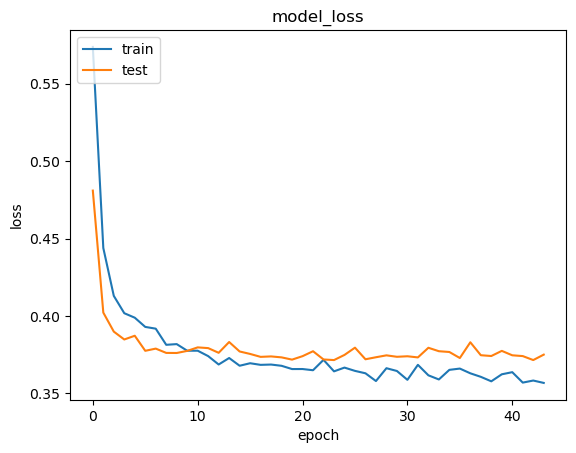

In [143]:
#summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [144]:
## making predictions and evaluating model
## predict test results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [145]:
## make confusion matrix

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1562,   33],
       [ 250,  155]], dtype=int64)

In [146]:
## calculate the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [147]:
score

0.8585

In [148]:
## get the weights

classifier.get_weights()

[array([[ 0.0051545 ,  0.1990324 ,  0.12364037,  0.04690865,  0.05325919,
          0.2192811 , -0.19372475,  0.42664555, -0.06219873, -0.06006609,
         -0.1936634 ],
        [ 0.40109605,  0.7463794 , -0.35506794,  0.9477472 ,  0.5572513 ,
         -0.15550253,  0.7573245 , -0.20616908, -0.4064722 , -0.38966894,
          0.19480574],
        [-0.11317419, -0.1928733 ,  0.03173974, -0.02627984,  0.42815444,
         -0.22131169,  0.11125661,  0.1291501 ,  0.30785683,  0.19001052,
          0.23082915],
        [ 0.18496208, -0.88521284,  0.6833897 ,  0.23716196, -0.0420706 ,
         -0.40542963,  0.24693744,  0.01777453, -0.898228  , -0.21326022,
         -0.19940351],
        [ 0.65906775, -0.325167  , -0.5974002 , -0.48653987,  1.3235556 ,
          0.77694947,  0.42572078, -0.48117262,  0.03515072, -0.10868919,
         -0.08054978],
        [-0.15803106, -0.06703834, -0.00280537,  0.08173759, -0.01983389,
         -0.11724771, -0.2326477 ,  0.5597918 , -0.13807951, -0.4232864